# [BIKE SHARING RELATIONSHIP - Group 21]

Group Members:

Yusuf Erkam Köksal (29512) <br>
Zeynep Özgür Gün (29502) <br>
Selen Naz Gürsoy (29390) <br>
Burçak Kaymaz (28985)<br>
Onat Ercan (25354)<br>
Selin Özgüven (24871)<br>

#Introduction

<font color="white">

With the improvement of traditional bike rentals, it has become much easier to rent and return bikes by being a member of bike sharing systems where everything is automated. Through this system, users can go from one location to another location and return the bikes at their destination. The aim of our project is to find a correlation between certain factors and the rate of bike sharing using the stored datasets, and to understand how the bike sharing system can be improved and the user rate can be increased. Based on the attributes included in the accessible stored data sets, the attributes we focus on are temperature, humudity, working day or weekend, time of day etc.

The steps are following:
  - Dataset collection related with bike sharing.
  - Analyzing the correlations between certain attributes and bike usage via plots and graphs that we create.
  - Making conclusions about relationships that we observed and decision-making for improvement of bike sharing system.

</font>

### Utilized Datasets


Only the main data set has been used [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)




##Data Exploration

<font color="white">
The 'Bike Sharing Dataset' is modified in order to display the necessary attributes more clearly. We've seperated the hours from the data we'll be analyzing, which are morning hours (7-9 a.m.) and evening hours (5-9 p.m.). With these two datasets, named 'morning' and 'evening', we've plotted barplots, heatmaps and scatter plots so that it'll be easier for us to draw conclusions about the factors that affect bike usage and in which way they affect it. Below, there is an explanation of the attributes in the dataset:


</font>

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

##Code

In [ ]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#HOUR DATASET

fhour = "hour.csv"
path_prefix = ''
dh = pd.read_csv(join(path_prefix, fhour))
dh.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#Checking to see if the data consists of missing values

print(dh.isna().sum(axis=0))

#since not we continue with the data

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
#modifying 'hour.csv' to see the necessary attributes more clearly

hourcopy = dh.copy()
hourcopy = hourcopy.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'casual', 'registered'], axis=1)
hourcopy.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,2,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,3,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,4,1,0.24,0.2879,0.75,0.0,1


In [ ]:
#Seperating the data to obtain dataframes with the desired hours, 7-8-9 a.m. for morning, 5-6-7 p.m. for evening hours
#MORNING

morning = hourcopy.drop(hourcopy[(hourcopy['hr'] < 7) | (hourcopy['hr'] > 9)].index)
morning.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,cnt
7,8,2011-01-01,7,1,0.20,0.2576,0.86,0.0000,3
8,9,2011-01-01,8,1,0.24,0.2879,0.75,0.0000,8
9,10,2011-01-01,9,1,0.32,0.3485,0.76,0.0000,14
30,31,2011-01-02,7,2,0.40,0.4091,0.76,0.1940,1
31,32,2011-01-02,8,3,0.40,0.4091,0.71,0.2239,8


In [ ]:
#EVENING

evening = hourcopy.drop(hourcopy[(hourcopy['hr'] < 17) | (hourcopy['hr'] > 19)].index)
evening.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,cnt
17,18,2011-01-01,17,2,0.44,0.4394,0.82,0.2836,67
18,19,2011-01-01,18,3,0.42,0.4242,0.88,0.2537,35
19,20,2011-01-01,19,3,0.42,0.4242,0.88,0.2537,37
40,41,2011-01-02,17,1,0.34,0.3333,0.57,0.1940,65
41,42,2011-01-02,18,2,0.36,0.3333,0.46,0.3284,53


# Visualization of Data

## WEATHER - BIKE USAGE

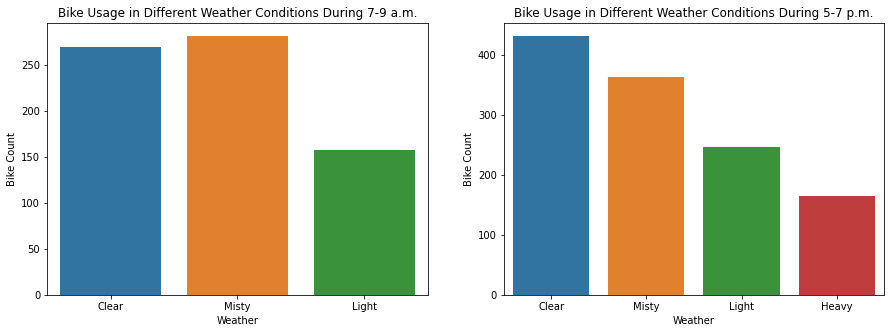

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x = morning["weathersit"], y = morning["cnt"], data=morning, palette="tab10", ci=0, ax=ax1)
ax1.set_title("Bike Usage in Different Weather Conditions During 7-9 a.m.")
ax1.set_xlabel('Weather')
ax1.set_ylabel('Bike Count')
ax1.set_xticklabels(['Clear', 'Misty', 'Light'])

sns.barplot(x = evening["weathersit"], y = evening["cnt"], data=evening, palette="tab10", ci=0, ax=ax2)
ax2.set_title("Bike Usage in Different Weather Conditions During 5-7 p.m.")
ax2.set_xlabel('Weather')
ax2.set_ylabel('Bike Count')
ax2.set_xticklabels(['Clear', 'Misty', 'Light','Heavy'])

plt.show()

## TEMPERATURE - BIKE USAGE




Highest temperature value observed during morning hours: 0.86 (in normalized Celcius)
Lowest temperature value observed during morning hours: 0.02 (in normalized Celcius)


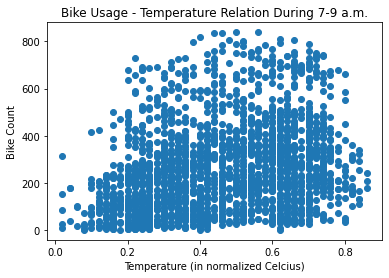

In [ ]:
plt.title("Bike Usage - Temperature Relation During 7-9 a.m.")

print("Highest temperature value observed during morning hours:", max(list(morning['temp'])), "(in normalized Celcius)")
print("Lowest temperature value observed during morning hours:", min(list(morning['temp'])), "(in normalized Celcius)")

plt.scatter(morning['temp'], morning['cnt'])
plt.xlabel('Temperature (in normalized Celcius)')
plt.ylabel('Bike Count')
plt.show()

Highest temperature value observed during evening hours: 0.98 (in normalized Celcius)
Lowest temperature value observed during evening hours: 0.08 (in normalized Celcius)


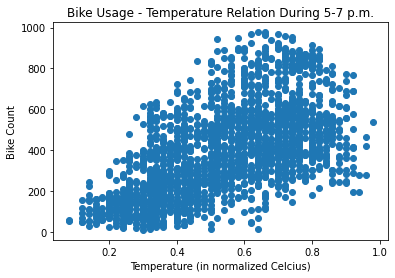

In [ ]:
plt.title("Bike Usage - Temperature Relation During 5-7 p.m.")

print("Highest temperature value observed during evening hours:", max(list(evening['temp'])), "(in normalized Celcius)")
print("Lowest temperature value observed during evening hours:", min(list(evening['temp'])), "(in normalized Celcius)")

plt.scatter(evening['temp'], evening['cnt'])
plt.xlabel('Temperature (in normalized Celcius)')
plt.ylabel('Bike Count')
plt.show()

## HUMIDITY - BIKE USAGE

Morning: 
 Highest humidity value observed during morning hours: 1.0
 Lowest humidity value observed during evening hours: 0.0
Evening: 
 Highest humidity value observed during evening hours: 1.0
 Lowest humidity value observed during evening hours: 0.0


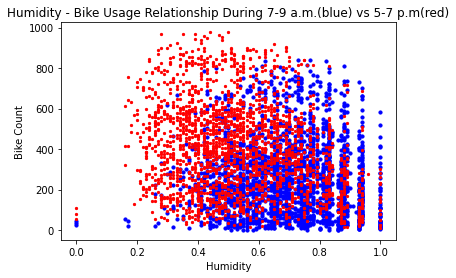

In [ ]:

print("Morning:","\n","Highest humidity value observed during morning hours:", max(list(evening['hum'])))
print(" Lowest humidity value observed during evening hours:", min(list(evening['hum'])))

plt.scatter(morning['hum'], morning['cnt'],color="blue", s=10)#label='morning'

print("Evening:","\n","Highest humidity value observed during evening hours:", max(list(evening['hum'])))
print(" Lowest humidity value observed during evening hours:", min(list(evening['hum'])))

plt.scatter(evening['hum'], evening['cnt'],color="red",s=5)#label='evening'

plt.title("Humidity - Bike Usage Relationship During 7-9 a.m.(blue) vs 5-7 p.m(red)")
plt.xlabel('Humidity')
plt.ylabel('Bike Count')
plt.show()

## WINDSPEED - BIKE USAGE

Morning: 
 Highest windspeed value observed during morning hours: 0.6567
 Lowest windspeed value observed during morning hours: 0.0
Evening: 
 Highest windspeed value observed during evening hours: 0.8507
 Lowest windspeed value observed during evening hours: 0.0


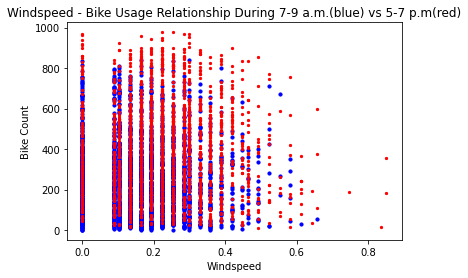

In [ ]:
print("Morning:","\n","Highest windspeed value observed during morning hours:", max(list(morning['windspeed'])))
print(" Lowest windspeed value observed during morning hours:", min(list(morning['windspeed'])))

plt.scatter(morning['windspeed'], morning['cnt'],color="blue",s=10)

print("Evening:","\n","Highest windspeed value observed during evening hours:", max(list(evening['windspeed'])))
print(" Lowest windspeed value observed during evening hours:", min(list(evening['windspeed'])))

plt.scatter(evening['windspeed'], evening['cnt'],color="red",s=5)

plt.title("Windspeed - Bike Usage Relationship During 7-9 a.m.(blue) vs 5-7 p.m(red)")
plt.xlabel('Windspeed')
plt.ylabel('Bike Count')
plt.show()

## Correlation of Morning and Evening Features (heatmap)

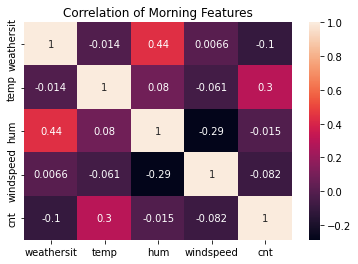

In [ ]:
sns.heatmap(morning.drop(["instant","hr","atemp"],axis=1).corr(), annot = True)
plt.title("Correlation of Morning Features")
plt.show()

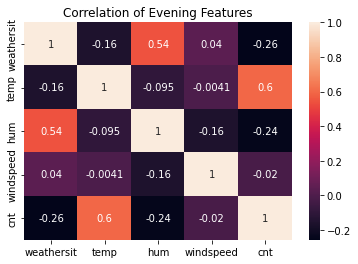

In [ ]:
sns.heatmap(evening.drop(["instant","hr","atemp"],axis=1).corr(), annot = True)
plt.title("Correlation of Evening Features")
plt.show()

#Distribution of the Data for Registered and Casual Users

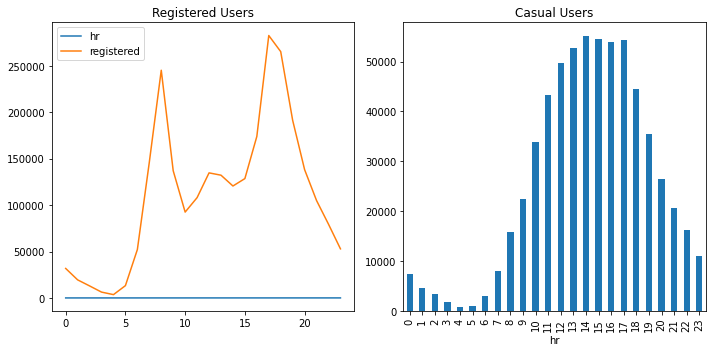

The sum of registered users is: 2672662
The sum of casual users is: 620017

Hypothesis test for the distribution of registered users
Expected number of registered users for each interval is: 111360.91666666667
[31755, 19455, 12940, 6281, 3554, 13249, 52115, 146134, 245240, 136980, 92468, 108034, 134696, 132206, 120563, 128543, 173914, 282640, 265276, 191284, 138172, 104875, 79412, 52876]
1349807.3018361467


<function print>

In [ ]:
registered_users = dh.groupby('hr')['registered'].sum().reset_index()
casual_users= dh.groupby('hr')['casual'].sum()

fig, ax = plt.subplots(1,2, figsize=(10,5))

registered_users.plot(ax=ax[0])
casual_users.plot.bar(ax=ax[1])


ax[0].set_title("Registered Users")
ax[1].set_title("Casual Users")

fig.tight_layout()
plt.show()


#It seems both type of users are not distributed evenly. Some hour intervals are more dominant then other(maybe people use transportation more for work etc.)
registered_users_sum = dh['registered'].sum()
print("The sum of registered users is:",registered_users_sum)

casual_users_sum = dh['casual'].sum()
print("The sum of casual users is:",casual_users_sum)

#Hypothesis test for registered users
#Null hypothesis: the registered users are evenly distributed across hours. The expected outcome for each time interval would be the sum of registered users
#which is registered_users_sum/24
expected_registered= registered_users_sum/24
print("")
print("Hypothesis test for the distribution of registered users")
print("Expected number of registered users for each interval is:",expected_registered)

registered_users_list = registered_users['registered'].tolist()
print(registered_users_list)

test_statistic = 0
for i in registered_users_list:
  x= int(i) - expected_registered
  y=x*x
  test_statistic+=(y)/expected_registered

print(test_statistic)
print
#When we apply chi square test, χ2(a=0.05, k-1=23) the critical value is 35.172
#Since the chi square works for upper tail test and the test statistic is larger than the critical value, we accept that we are in the rejection region
#Therefore we reject the H0 for a = 0.05 and conclude that the registered user data is not evenly distributed.

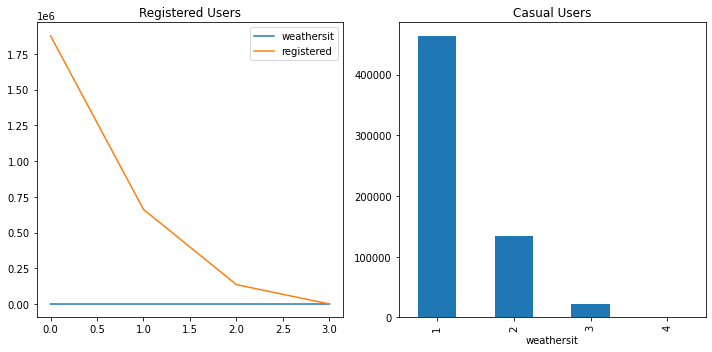

The sum of registered users is: 2672662
The sum of casual users is: 620017

Hypothesis test for the distribution of registered users
Expected number of registered users for each interval is: 668165.5
[1875428, 661471, 135548, 215]
3273690.1740556797


<function print>

In [ ]:
registered_users = dh.groupby('weathersit')['registered'].sum().reset_index()
casual_users= dh.groupby('weathersit')['casual'].sum()

fig, ax = plt.subplots(1,2, figsize=(10,5))

registered_users.plot(ax=ax[0])
casual_users.plot.bar(ax=ax[1])


ax[0].set_title("Registered Users")
ax[1].set_title("Casual Users")

fig.tight_layout()
plt.show()


#It seems both type of users are not distributed evenly. Some weathersituations are more dominant then other.
registered_users_sum = dh['registered'].sum()
print("The sum of registered users is:",registered_users_sum)

casual_users_sum = dh['casual'].sum()
print("The sum of casual users is:",casual_users_sum)

#Hypothesis test for registered users
#Null hypothesis: the registered users are evenly distributed across weather situations. The expected outcome for each time interval would be the sum of registered users
#which is registered_users_sum/4
expected_registered= registered_users_sum/4
print("")
print("Hypothesis test for the distribution of registered users")
print("Expected number of registered users for each interval is:",expected_registered)

registered_users_list = registered_users['registered'].tolist()
print(registered_users_list)

test_statistic = 0
for i in registered_users_list:
  x= int(i) - expected_registered
  y=x*x
  test_statistic+=(y)/expected_registered

print(test_statistic)
print
#When we apply chi square test, χ2(a=0.05, k-1=3) the critical value is 2.366
#Since the chi square works for upper tail test and the test statistic is larger than the critical value, we accept that we are in the rejection region
#Therefore we reject the H0 for a = 0.05 and conclude that the registered user data is not evenly distributed.

# Machine Learning Models


In [ ]:
from sklearn.model_selection import train_test_split

hourcopy = hourcopy.drop('dteday',axis=1)

X = hourcopy.drop('cnt', axis=1)
y = hourcopy['cnt']

# 70% for the training data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=0)

#splitting the remaining into half for validation & testing (15% - 15%):
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision tree model:
decision_tree_model = DecisionTreeClassifier(criterion= "entropy",random_state=0)
decision_tree_model.fit(X_train, y_train)

# Random forest model
random_forest_model = RandomForestClassifier(random_state=0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Feature Importances



Text(0.5, 1.0, 'Feature Importances For Random Forest')

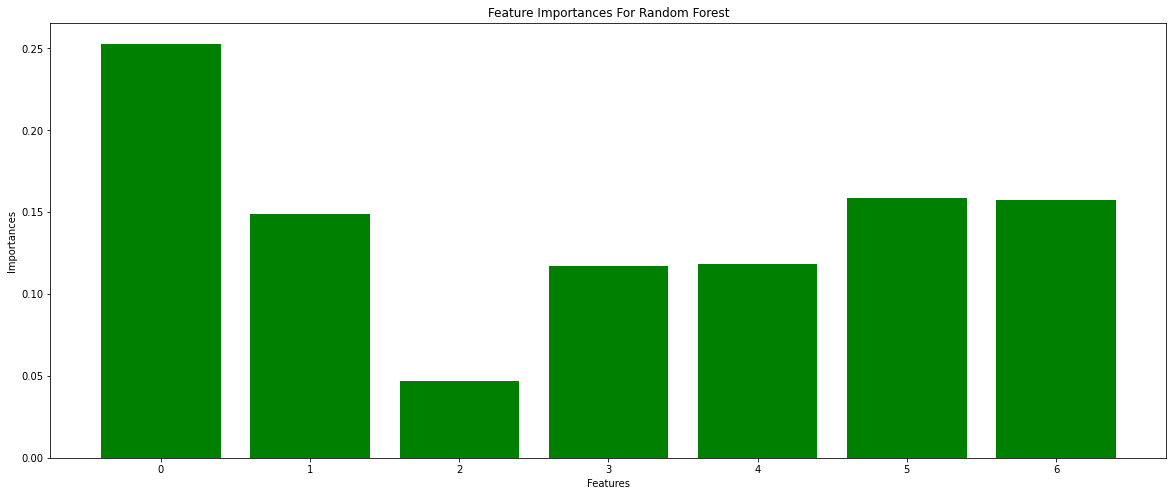

In [ ]:

importances = list(random_forest_model.feature_importances_)
sorted_importances = sorted(importances, reverse=True)
sorted_indices = [importances.index(importance) for importance in sorted_importances]

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(sorted_indices, sorted_importances,color='green')
ax.set_xticks(sorted_indices)
ax.set_xticklabels(sorted_indices)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances For Random Forest")


Text(0.5, 1.0, 'Feature Importances For Decision Tree')

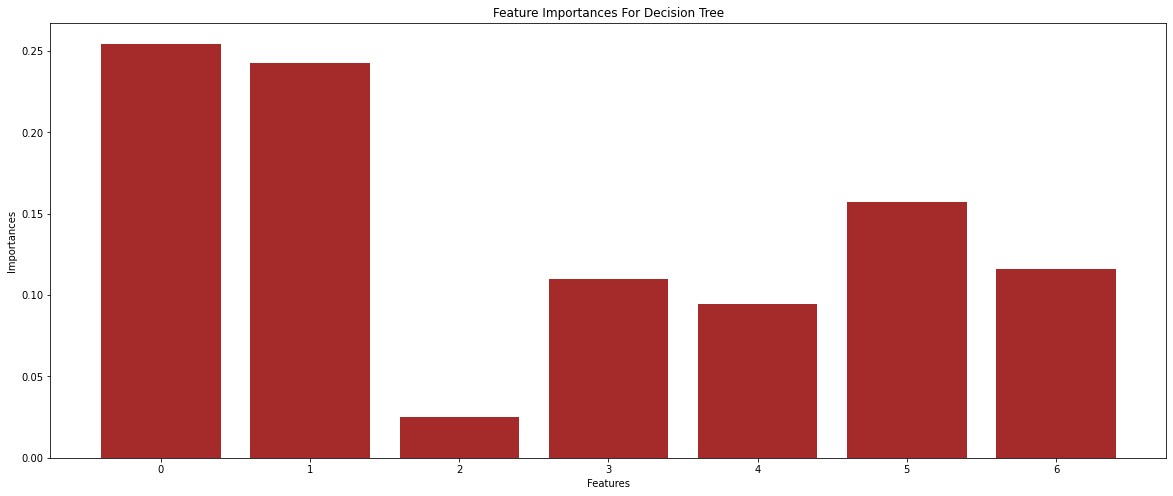

In [ ]:
importances = list(decision_tree_model.feature_importances_)
sorted_importances = sorted(importances, reverse=True)
sorted_indices = [importances.index(importance) for importance in sorted_importances]

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(sorted_indices, sorted_importances, color='brown')
ax.set_xticks(sorted_indices)
ax.set_xticklabels(sorted_indices)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances For Decision Tree")

## Implementation



<font color="white">
Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.
</font>

In [ ]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
from sklearn.metrics import accuracy_score

dt_predictions = decision_tree_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("The accuracy score of the decision tree is", dt_accuracy)

rf_predictions = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("The accuracy score of the random forest is", rf_accuracy)

if dt_accuracy > rf_accuracy:
    print("According to the accuracy scores, the decision tree model performs better.")
else:
    print("According to the accuracy scores, the random forest model performs better.")

The accuracy score of the decision tree is 0.02032988108937476
The accuracy score of the random forest is 0.02032988108937476
According to the accuracy scores, the random forest model performs better.


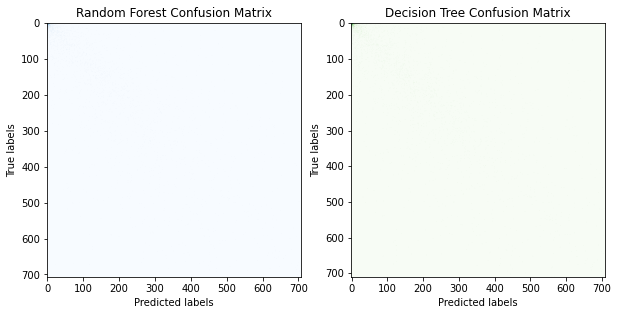

In [ ]:

from sklearn.metrics import confusion_matrix

# Calculate the predictions for the validation set
y_pred = random_forest_model.predict(X_val)
random_cm = confusion_matrix(y_val, y_pred)

# Calculate the predictions for the validation set
y_pred = decision_tree_model.predict(X_val)
decision_cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the random forest model
axs[0].imshow(random_cm, cmap='Blues')
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('Random Forest Confusion Matrix')

# Plot the confusion matrix for the decision tree model
axs[1].imshow(decision_cm, cmap='Greens')
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('Decision Tree Confusion Matrix')

plt.show()


### Results & Discussion

<font color="white">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

**Data Interpretation for Visualization of Data**

If we analyze the bike usage based on weather conditions:

* Highest count of bike usage between 7-9 a.m. (morning) with misty weather.

* Highest count of bike usage between 5-7 p.m. (evening) with clear weather.

If we analyze the bike usage based on temperature:

* Highest count of bike usage between 7-9 a.m. (morning), range between 0.4 and 0.6 celsius.

* Highest count of bike usage between 5-7 p.m. (evening), range between 0.6 and 0.8 celsius.

If we analyze the bike usage based on humidity:

* Less humid air is preferred by biker in the morning and more humid air is preferred in the evening than morning.

If we analyze the bike usage based on windspeed:
* Regardless of morning or evening, the times when the wind is low are preferred.

**Data Interpretation for Distribution of the Data for Registered and Casual Users**

When we look at the distribution of registered users, we see an accelerated increase from approximately 5 am to 8 am. This may be because people use it on their way to work. We see a decrease to 15 and an increase again at 15-17 hours. Then there is the downward trend.

When we look at casual users, on the contrary to registered users, there is heavy usage during the day. The number of users increasing after 5 starts a downward trend after 17.

**Data Interpretation for Machine Learning Data**

First of all, sklearn library is used to split the data into smaller data sets such as training, validation, and test. Therefore, the X variable contains the features of the data and the y variable contains the target values. The train_test_split function is used to split the data into training and test sets, with 70% of the data is used for training and 30% is used for testing the trained data. The resulting training and testing sets are stored in the variables **X_train, X_remaining, y_train, and y_remaining**. Then, the remaining 30% of the data is split into two additional sets: a validation set and a test set, each contatining 15% of the initial data. Among these data sets, the validation set will be used to tune the model hyperparameters, and the test set will be used to evaluate the final model. These sets are stored in the variables X_test, X_val, y_test, and y_val.

The next block of code imports the DecisionTreeClassifier and RandomForestClassifier classes from the tree and ensemble modules of the sklearn library, respectively. These classes implement decision tree and random forest algorithms for classification tasks. Our code then creates two instances of these classes: a decision tree model and a random forest model. The models are fit to the training data by using the fit method.

Finally, our code computes the feature importances of the random forest model and creates a bar plot visualizing these importances. The x-axis of the plot is labeled with the indices of the features, and the y-axis is labeled with the importances. The plot is labeled with appropriate x and y axis labels and a title.

As a result of the

## Conclusion

<font color="white">
Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?
</font>


Based on the given data interpretations, it appears that bike usage is higher in the morning between 7-9 a.m. and in the evening between 5-7 p.m. The weather conditions that coincide with the highest bike usage are misty weather in the morning and clear weather in the evening. The temperature range that corresponds with the highest bike usage is between 0.4 and 0.6 degrees Celsius in the morning and between 0.6 and 0.8 degrees Celsius in the evening. Humidity levels are preferred to be lower in the morning and higher in the evening. Additionally, times of low wind speed are preferred for bike usage regardless of the time of day.

**In order to conclude our project, there are some following findings that are supported by our data:**

* During peak weekday hours, there may be over 400 rentals on average, while on weekends the average is between 300 and 400 rentals. Even though there are fewer bike rentals during weekends compared to weekdays, this situation can be related with other factors such as temperature, humidity and windspeed.

* On weekdays, the busiest rental times are typically from 7-9am and 4-7pm, while on weekends the busiest times are from 12-4pm. Therefore, we focused on the busiest time interval in our data.

* The number of registered and casual bike users tends to increase or decrease together. Most bike rentals are done by registered users, who average more than 150 rentals per hour.

* The average number of bike rentals tends to increase as the temperature gets warmer, but drops significantly when the temperature exceeds 34 degrees Celsius. It means that even though the temperature is positively related with bike rentals at some point, higher temperature might decrease bike rentals.

* Higher levels of humidity and wind speed tend to lead to fewer bike rentals, which is showing the negative correlation between humidity & windspeed and bike rentals.

* There are very few rentals on days with light or heavy snowfall, and even fewer rentals during holiday snowstorms. This situation shows that bad weather conditions have a significant impact upon bike rental.



**Based on this conclusion, how can the average number of bike rentals be increased in general?**

1. Bike rentals can be more promoted during the fall season, as this is the time where there is the highest average number of rentals.

2. Use of bikes can be encouraged during weekdays, as there are typically more rentals on average during this time.

3. Offering more promotions or discounts can be considered during the spring season, which tends to have the lowest average number of rentals.

4. More information can be provided to users about the best times to rent bikes on weekdays (7-9am and 4-7pm) and on weekends (12-4pm) to increase the chances of getting a bike at these most significant times.

5. Implementing various strategies can be considered to mitigate the negative effects of high humidity and wind speed on bike rentals, such as providing weather-resistant bikes or offering discounts on rainy days.

6. Bike rentals can be promoted on days with good weather, as the average number of rentals tends to increase with warmer temperatures.





## Work Division

<font color="white">
A clear description of the division of work among teammates.
</font>

Yusuf Erkam Köksal - Description of the Problem, Dataset Analyzation, Data Distribution and Hypothesis Testing

Zeynep Özgür Gün -  Data Cleaning & Visualization of Data, Machine Learning Methods, Data Interpretation

Selen Naz Gürsoy - Data Cleaning & Visualization of Data, Machine Learning Methods, Data Interpretation

Burçak Kaymaz - Description of the Problem, Machine Learning Methods, Data Distrubution and Hypothesis Testing

Onat Ercan - Introduction to the Problem, Data Distribution and Hypothesis Testing, Data Interpretation

Selin Özgüven - Introduction to the Problem, Machine Learning Methods, Data Interpretation